In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
df = pd.read_csv('/content/synthetic_loan_default_data.csv')

In [3]:
df.head()

,UserID,Gender,Age,AnnualIncome,LoanAmount,CreditScore,Defaulted
0,75682867,Male,67,117974,41059,432,1
1,66755036,Female,45,82728,34742,575,1
2,66882282,Male,45,26246,5133,812,0
3,31081788,Female,54,142796,15663,612,1
4,23315092,Female,58,107263,22754,583,1


In [4]:
df = df[['Age','AnnualIncome','LoanAmount','CreditScore','Defaulted']]

In [5]:
df.head()

,Age,AnnualIncome,LoanAmount,CreditScore,Defaulted
0,67,117974,41059,432,1
1,45,82728,34742,575,1
2,45,26246,5133,812,0
3,54,142796,15663,612,1
4,58,107263,22754,583,1


In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
X

,Age,AnnualIncome,LoanAmount,CreditScore
0,67,117974,41059,432
1,45,82728,34742,575
2,45,26246,5133,812
3,54,142796,15663,612
4,58,107263,22754,583
...,...,...,...,...
395,31,57520,6724,491
396,49,79772,12083,316
397,68,65106,46917,419
398,55,96121,20816,692


In [10]:
y

,Defaulted
0,1
1,1
2,0
3,1
4,1
...,...
395,0
396,1
397,1
398,1


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_scaled.shape

(400, 4)

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# Stochastic Gradient Descent

In [14]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=4))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171 (684.00 B)

 Trainable params: 171 (684.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2) # Stochastic Gradient Descent
print(time.time() - start)

Epoch 1/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8454 - loss: 0.5071 - val_accuracy: 0.9000 - val_loss: 0.3773
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8127 - loss: 0.3796 - val_accuracy: 0.9375 - val_loss: 0.2581
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8928 - loss: 0.2648 - val_accuracy: 0.9375 - val_loss: 0.1859
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9395 - loss: 0.1874 - val_accuracy: 0.9500 - val_loss: 0.1372
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9558 - loss: 0.1410 - val_accuracy: 0.9625 - val_loss: 0.1112
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9761 - loss: 0.1008 - val_accuracy: 0.9625 - val_loss: 0.0935
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9748 - loss: 0.0866 - val_accuracy: 0.9625 - val_loss: 0.0831
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9598 - loss: 0.1154 - val_accu

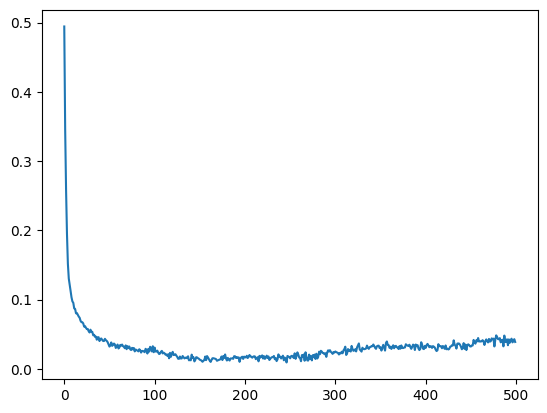

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

# Batch Gradient Descent

In [19]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=4))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=250,validation_split=0.2) # Batch Gradient Descent
print(time.time() - start)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 0.8142 - loss: 0.6252 - val_accuracy: 0.9000 - val_loss: 0.6017
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.8083 - loss: 0.6175 - val_accuracy: 0.9000 - val_loss: 0.5912
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8224 - loss: 0.6057 - val_accuracy: 0.9000 - val_loss: 0.5837
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.8158 - loss: 0.6033 - val_accuracy: 0.9000 - val_loss: 0.5756
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8131 - loss: 0.5971 - val_accuracy: 0.9000 - val_loss: 0.5676
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8198 - loss: 0.5846 - val_accuracy: 0.9000 - val_loss: 0.5616
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8117 - loss: 0.5879 - val_accuracy: 0.9000 - val_loss: 0.5543
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8171 - loss: 0.5787 - val_accuracy: 0.9000 - val_loss: 0.5478

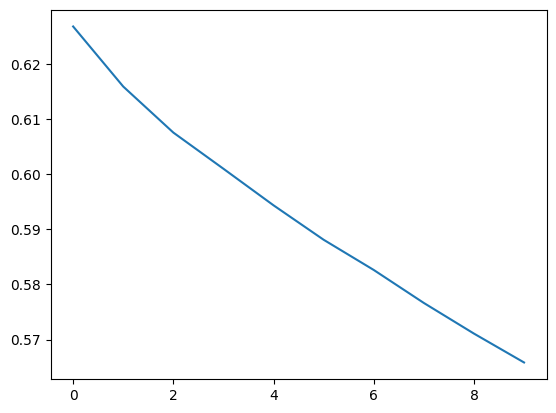

In [21]:
plt.plot(history.history['loss'])